# in this project i will be cleaning and analysing computer hardware sales dataset

In [2]:
# importing the necessary modules

import pandas as pd
import os
import matplotlib.pyplot as pyplot



# bellow are the files in the folder where the dataset is located

In [3]:
path='C:/Users/kelvin/Desktop/projct/proj3'
files=[file for file in os.listdir(path)]
for file in files:
    print(file)

.ipynb_checkpoints
computer hardware sales.ipynb
hardwareStore.csv


# I'll be working on the hardwarestore.csv file ,starting by cleaning the data

In [5]:
df=pd.read_csv('hardwareStore.csv')
df.head()

,CATEGORY_ID,CATEGORY_NAME,PRODUCT_ID,PRODUCT_NAME,DESCRIPTION,DESCRIPTION - Detail 1,DESCRIPTION - Detail 2,DESCRIPTION - Detail 3,DESCRIPTION - Detail 4,STANDARD_COST,...,REGION_ID,LOCATION_ID,WAREHOUSE_ID,QUANTITY,WAREHOUSE_NAME,ADDRESS,POSTAL_CODE,CITY,STATE,COUNTRY_NAME
0,1,CPU,8,Intel Xeon E5-1650 V4,"Speed:3.6GHz,Cores:6,TDP:140W",Speed:3.6GHz,Cores:6,TDP:140W,NaN,535.47,...,3,11,8,50,Beijing,40-5-12 Laogianggen,190518,Beijing,Shenzhen,China
1,1,CPU,8,Intel Xeon E5-1650 V4,"Speed:3.6GHz,Cores:6,TDP:140W",Speed:3.6GHz,Cores:6,TDP:140W,NaN,535.47,...,3,12,9,36,Bombay,1298 Vileparle (E),490231,Bombay,Maharashtra,India
2,1,CPU,8,Intel Xeon E5-1650 V4,"Speed:3.6GHz,Cores:6,TDP:140W",Speed:3.6GHz,Cores:6,TDP:140W,NaN,535.47,...,2,6,2,97,San Francisco,2011 Interiors Blvd,99236,South San Francisco,California,United States of America
3,1,CPU,8,Intel Xeon E5-1650 V4,"Speed:3.6GHz,Cores:6,TDP:140W",Speed:3.6GHz,Cores:6,TDP:140W,NaN,535.47,...,2,8,4,67,"Seattle, Washington",2004 Charade Rd,98199,Seattle,Washington,United States of America
4,1,CPU,8,Intel Xeon E5-1650 V4,"Speed:3.6GHz,Cores:6,TDP:140W",Speed:3.6GHz,Cores:6,TDP:140W,NaN,535.47,...,3,13,6,30,Sydney,12-98 Victoria Street,2901,Sydney,New South Wales,Australia


# removing some unwanted  columns

In [14]:
df=df.drop(['LIST_PRICE','COUNTRY_ID'],axis=1)
df.to_excel("computer hardware sales.xlsx",index=False)

# new dataset  is  computer hardware sales.xlsx

In [16]:
df=pd.read_excel('computer hardware sales.xlsx')
df.dtypes

CATEGORY_NAME      object
PRODUCT_NAME       object
DESCRIPTION        object
STANDARD_COST     float64
QUANTITY            int64
WAREHOUSE_NAME     object
CITY               object
STATE              object
COUNTRY_NAME       object
dtype: object

# Let's find which product category had the most sales and show it using a pie chart

In [19]:
categories=df['CATEGORY_NAME'].unique()
print(f"A Products belongs to one of this {len(categories)} categories..\n")
for  category in categories:
    print(category)

A Products belongs to one of this 4 categories..

CPU
Video Card
Mother Board
Storage


In [21]:
#first let's add a totals column to our dataframe

df['total']=df['QUANTITY']*df['STANDARD_COST']
df.to_excel('computer hardware sales.xlsx',index=False)

In [24]:
df.dtypes

CATEGORY_NAME      object
PRODUCT_NAME       object
DESCRIPTION        object
STANDARD_COST     float64
QUANTITY            int64
WAREHOUSE_NAME     object
CITY               object
STATE              object
COUNTRY_NAME       object
total             float64
dtype: object

In [29]:
#let's find total sales in each category
cpu=0
storage=0
mother_board=0
video_cards=0

for i in range(len(df)):
    if df.loc[i].CATEGORY_NAME=="CPU":
        cpu+=df.loc[i].total
    elif df.loc[i].CATEGORY_NAME=="Storage":
        storage+=df.loc[i].total
    elif df.loc[i].CATEGORY_NAME=="Video Card":
        video_cards+=df.loc[i].total
    elif df.loc[i].CATEGORY_NAME=="Mother Board":
        mother_board+=df.loc[i].total
        
print(f"Total CPU sales were {cpu}")
print(f"Total storage devices sales were {storage}")
print(f"Total Mother boards sales were {mother_board}")
print(f"Total Video card sales were {video_cards}")

Total CPU sales were 19651362.04000001
Total storage devices sales were 21558470.67
Total Mother boards sales were 5004674.710000001
Total Video card sales were 39612324.97999996


In [ ]:
#Bellow is a pie chart showing how various product categories competed on sales mades 


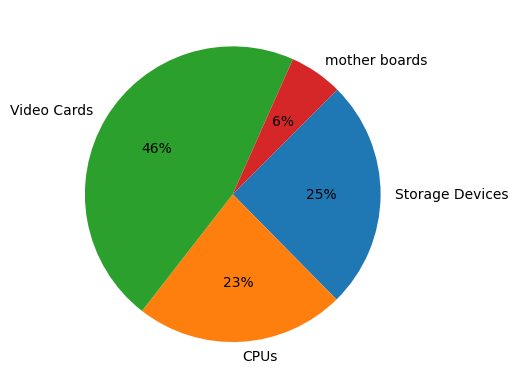

In [31]:
labels=["Storage Devices","CPUs","Video Cards","mother boards"]
sizes=[storage,cpu,video_cards,mother_board]
pyplot.pie(
    sizes,
    labels=labels
    ,autopct='%1.f%%',counterclock=False,startangle=45)
pyplot.show()

# Let's see how various product categories sold in various countries ,starting  with China

In [34]:
countries=df['COUNTRY_NAME'].unique()
for c in countries:
    print(c)

China
India
United States of America
Australia
Canada
Mexico


In [36]:
cpu=0
storage=0
mother_board=0
video_cards=0
for i in range(len(df)):
      if df.loc[i].COUNTRY_NAME=="China":
                if df.loc[i].CATEGORY_NAME=="CPU":
                     cpu+=df.loc[i].total
                elif df.loc[i].CATEGORY_NAME=="Storage":
                     storage+=df.loc[i].total
                elif df.loc[i].CATEGORY_NAME=="Video Card":
                    video_cards+=df.loc[i].total
                elif df.loc[i].CATEGORY_NAME=="Mother Board":
                    mother_board+=df.loc[i].total
                    
print(f"Total CPU sales in china were  {cpu}")
print(f"Total storage devices sales in china were {storage}")
print(f"Total Mother boards sales in china were {mother_board}")
print(f"Total Video card sales in china were {video_cards}")

Total CPU sales in china were  2422261.45
Total storage devices sales in china were 2519737.74
Total Mother boards sales in china were 733699.1399999999
Total Video card sales in china were 2548010.06


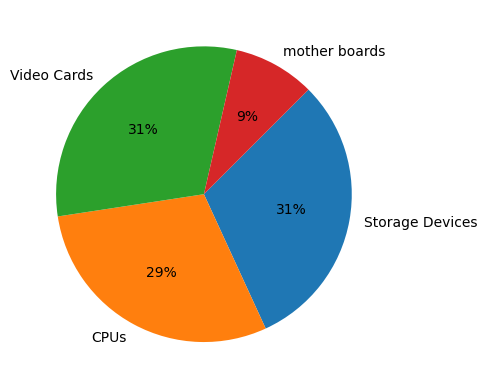

In [37]:
##Bellow is a piechart on showing how various product categories sold in china

labels=["Storage Devices","CPUs","Video Cards","mother boards"]
sizes=[storage,cpu,video_cards,mother_board]
pyplot.pie(
    sizes,
    labels=labels
    ,autopct='%1.f%%',counterclock=False,startangle=45)
pyplot.show()